# Лабораторная работа №3

### Тема: Глубокое обучение и его применение в анализе данных

Глубокое обучение (deep learning) — это направление машинного обучения, основанное на использовании многослойных нейронных сетей (глубинных архитектур) для автоматического выявления сложных паттернов в данных.

Полносвязная нейронная сеть — это архитектура, в которой каждый нейрон текущего слоя связан со всеми нейронами предыдущего слоя. Нейрон — это базовый элемент сети, вычисляющий взвешенную сумму входных сигналов, к которой применяется функция активации (например, ReLU). Сеть состоит из входного слоя (принимает данные), скрытых слоёв (преобразуют данные) и выходного слоя (формирует результат). Такие сети универсальны для задач с табличными данными, но требуют много параметров, что делает их менее эффективными для пространственных или временных зависимостей.

Свёрточная сеть специализируется на обработке данных с сеточной структурой (например, изображений) за счет сверточных слоёв. Свёрточный слой использует ядра (фильтры) — малые матрицы, скользящие по входным данным и выделяющие локальные признаки (края, текстуры). Пулинг-слои (например, max pooling) сокращают размерность данных, сохраняя ключевые паттерны и обеспечивая инвариантность к сдвигу объекта на изображении. Полносвязные слои в CNN объединяют выделенные признаки для классификации. Эти сети доминируют в компьютерном зрении, так как эффективно обрабатывают пространственные зависимости.

Рекуррентные сети предназначены для последовательных данных (текст, временные ряды). Их ключевая особенность — рекуррентные связи, позволяющие сохранять информацию о предыдущих шагах через скрытое состояние. Это делает их подходящими для задач, где контекст важен (например, перевод предложений). Однако базовые RNN страдают от проблемы затухающих градиентов, поэтому чаще используют их модификации (LSTM, GRU).

Полносвязные сети подходят для структурированных данных, но неэффективны для изображений или текста из-за отсутствия специализированных механизмов обработки. Свёрточные сети оптимизированы для пространственных данных благодаря локальным связям и пулингу, что снижает вычислительную нагрузку. Рекуррентные сети работают с последовательностями, но их последовательная обработка медленнее, чем параллельная в CNN. Выбор архитектуры зависит от типа данных: CNN для изображений, RNN для текста/временных рядов, полносвязные — для простых задач с табличными данными.

## Задача №1: Построение базовой нейронной сети для классификации изображений

1. Используйте библиотеку TensorFlow или PyTorch.
2. Загрузите датасет MNIST (или CIFAR-10).
3. Постройте простую полносвязную нейронную сеть для классификации
изображений.
4. Обучите сеть на тренировочных данных и оцените её точность на
тестовых данных.
5. Визуализируйте примеры предсказаний сети, включая правильно и
неправильно классифицированные изображения.

In [32]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [33]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [34]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()


In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [36]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} - Loss: {running_loss/len(trainloader):.4f}")

Epoch 1 - Loss: 0.4080
Epoch 2 - Loss: 0.1928
Epoch 3 - Loss: 0.1392
Epoch 4 - Loss: 0.1100
Epoch 5 - Loss: 0.0935


In [37]:
correct = 0
total = 0
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.numpy())
        all_preds.extend(predicted.numpy())
        
print(f"Точность на тестовых данных: {100 * correct / total:.2f}%")

Точность на тестовых данных: 96.65%


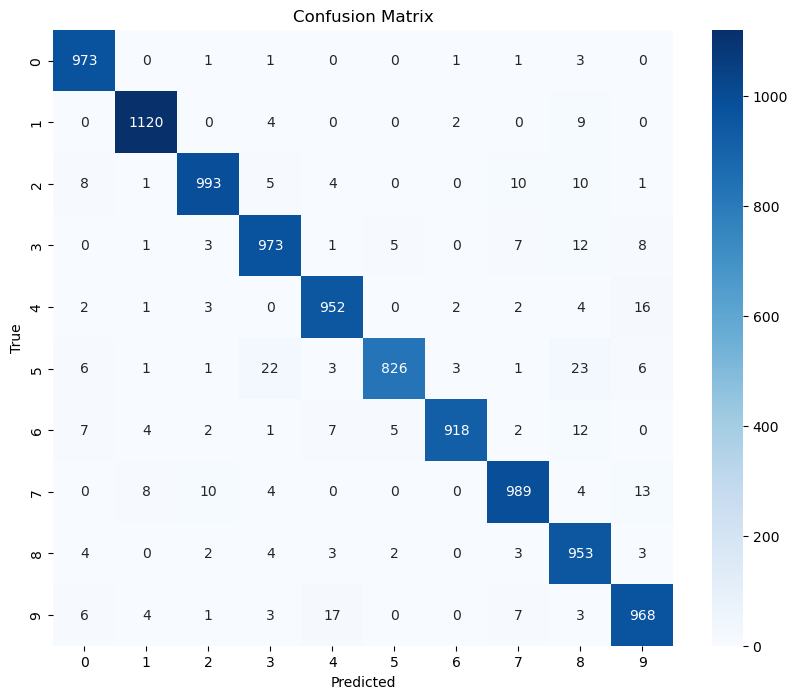

In [38]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

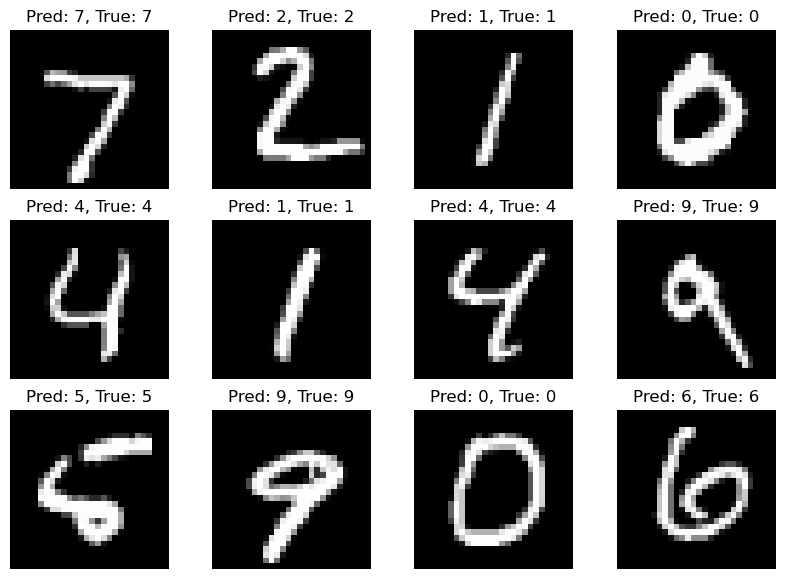

In [39]:
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

fig, axes = plt.subplots(3, 4, figsize=(10, 7))
for i, ax in enumerate(axes.flat):
    img = images[i].numpy().squeeze()
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {predicted[i]}, True: {labels[i]}")
    ax.axis('off')
plt.show()

### Вывод: Нейронные сети позволяют значительно точнее подстраиваться под данные с болшим количеством параметров, а также за счёт принципа работы значительно лучше справляются с мульиклассификацией. Существует большое количество подходов, позволяющих увеличить точность и универсальность нейронных сетей. Неёронные сети очень подвержены переобучению

### Использованные источники информации:
- https://aws.amazon.com/what-is/recurrent-neural-network/#:~:text=RNNs%20work%20by%20passing%20the,a%20short%2Dterm%20memory%20component.
- https://education.yandex.ru/handbook/ml
- https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939/